# Practice


In [29]:
import numpy as np
import pandas as pd
import pickle
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as pyplot

In [65]:
data = pd.read_csv('./cardata/merc.csv', sep=',', skipinitialspace=True)
data = data[["model", "year", "price", "transmission", "mileage", "fuelType", "engineSize"]]
predict = "price"

dummy = pd.get_dummies(data, columns=['model', 'transmission', 'fuelType'], prefix="dmy")
print(dummy.drop([predict], 1).keys()) # prints all model fields needed for every manufacturer

X = np.array(dummy.drop([predict], 1))
y = np.array(dummy[predict])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

Index(['year', 'mileage', 'engineSize', 'dmy_180', 'dmy_200', 'dmy_220',
       'dmy_230', 'dmy_A Class', 'dmy_B Class', 'dmy_C Class', 'dmy_CL Class',
       'dmy_CLA Class', 'dmy_CLC Class', 'dmy_CLK Class', 'dmy_CLS Class',
       'dmy_E Class', 'dmy_G Class', 'dmy_GL Class', 'dmy_GLA Class',
       'dmy_GLB Class', 'dmy_GLC Class', 'dmy_GLE Class', 'dmy_GLS Class',
       'dmy_M Class', 'dmy_R Class', 'dmy_S Class', 'dmy_SL CLASS',
       'dmy_SLK Class', 'dmy_V Class', 'dmy_X Class', 'dmy_Automatic',
       'dmy_Manual', 'dmy_Diesel', 'dmy_Hybrid', 'dmy_Petrol'],
      dtype='object')


/var/folders/t3/l3sq8rr96kd2f33_6q8py6f00000gn/T/ipykernel_26509/4257397475.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  print(dummy.drop([predict], 1).keys()) # prints all model fields needed for every manufacturer
/var/folders/t3/l3sq8rr96kd2f33_6q8py6f00000gn/T/ipykernel_26509/4257397475.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dummy.drop([predict], 1))


In [66]:

best = 0
for _ in range(10):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

    model = RandomForestRegressor(n_estimators=100, max_features=7)
    model.fit(x_train, y_train)

    acc = model.score(x_test, y_test)
    if acc > best:
        best = acc
        with open("mercedesModel.pickle", "wb") as f:
            pickle.dump(model, f)
print(best)

pickle_in = open("mercedesModel.pickle", "rb")
linear = pickle.load(pickle_in)

0.92815323028741


In [64]:
predictions = model.predict(x_test)
for x in range(len(predictions)):
    print(predictions[x], y_test[x], x_test[x])

8987.25 9259 [2.0130e+03 7.4149e+04 1.5000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00]
35308.193844488844 36809 [2.02e+03 1.00e+03 1.50e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 1.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00 0.00e+00
 0.00e+00 0.00e+00 1.00e+00]
31539.41 27991 [2.0180e+03 1.0327e+04 2.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00

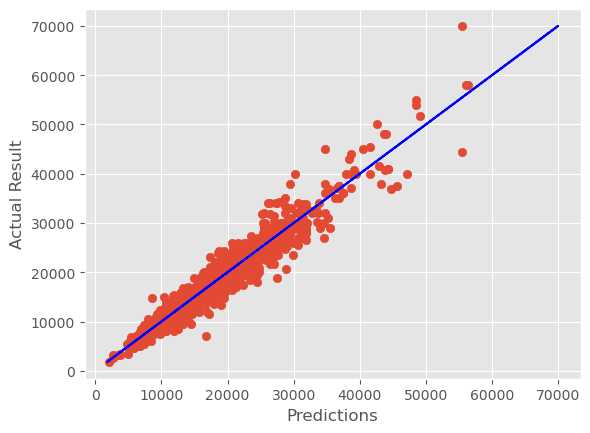

In [58]:
p = 'Predictions'
pyplot.style.use("ggplot")
pyplot.scatter(predictions, y_test)
pyplot.plot(y_test,y_test,color='blue')
pyplot.xlabel(p)
pyplot.ylabel("Actual Result")
pyplot.show()

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dummy.columns.tolist())
    print(dummy.head(2))

   year  price  mileage  engineSize  dmy_A1  dmy_A2  dmy_A3  dmy_A4  dmy_A5  \
0  2017  12500    15735         1.4       1       0       0       0       0   
1  2016  16500    36203         2.0       0       0       0       0       0   

   dmy_A6  dmy_A7  dmy_A8  dmy_Q2  dmy_Q3  dmy_Q5  dmy_Q7  dmy_Q8  dmy_R8  \
0       0       0       0       0       0       0       0       0       0   
1       1       0       0       0       0       0       0       0       0   

   dmy_RS3  dmy_RS4  dmy_RS5  dmy_RS6  dmy_RS7  dmy_S3  dmy_S4  dmy_S5  \
0        0        0        0        0        0       0       0       0   
1        0        0        0        0        0       0       0       0   

   dmy_S8  dmy_SQ5  dmy_SQ7  dmy_TT  dmy_Automatic  dmy_Manual  dmy_Diesel  \
0       0        0        0       0              0           1           0   
1       0        0        0       0              1           0           1   

   dmy_Hybrid  dmy_Petrol  
0           0           1  
1           0   